In [1]:
import nltk
import os
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk import word_tokenize
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

import seaborn as sns


import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file_names = os.listdir('../Readings')

fileDict = {}
for file_name in file_names:
    if file_name.endswith(".txt"):
        fileDict[file_name] = open('../readings/' + file_name, encoding='latin2').read()

imTitles = list(fileDict.keys())
imTexts = list(fileDict.values())

In [3]:
def plotStylometry(allTexts, allTitles):
    # Set up the vectorizer with parameters
    tfidfVectorizer = TfidfVectorizer(max_features=400)
    
    # Actually do the transform, allTexts is a list, so 
    # you end up with a multi-dimensional matrix
    textMatrix = tfidfVectorizer.fit_transform(allTexts)
    
    # Fill in the gaps, else it's a sparse matrix
    # to save space
    denseTextMatrix = textMatrix.todense()
    
    # For debug purposes, what is the shape of the matrix
    print(denseTextMatrix.shape)
    
    # PCA can compress the multi-dimensional matrix
    # to a 2-dimensional (in this case) matrix
    pca = PCA(n_components=2)
    textPoints = pca.fit_transform(denseTextMatrix)
    
    # Create a data frame of this two dimensional table/matrix
    # set index to be the titles and provide it with columns
    textDf = pd.DataFrame(textPoints, index=allTitles, columns=['C1','C2'])
    
    # Do a plot of the data frame - you have to give it the x, y
    ax = textDf.plot(kind='scatter', x='C1', y='C2', figsize=(8,8))

    # Annotate the points with the titles
    for title, points in textDf.iterrows():
        ax.annotate(title, points)
    
    plt.show()  
    
    links = linkage(textDf, method='ward')
    
    plt.subplots(figsize=(10, 10))
    
#     my_palette = dict(zip(textDf.C1.unique(), ["orange","yellow","brown"]))
#     row_colors = df.C1.map(my_palette)

    
    _ = dendrogram(links, labels=allTitles, orientation='left')
    
   # sns.clustermap(textDf, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)
  #  sns.clustermap(textDf)

    
    plt.show()

(26, 400)


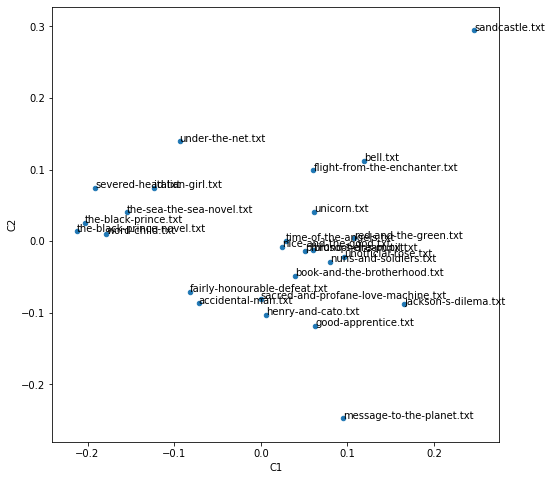

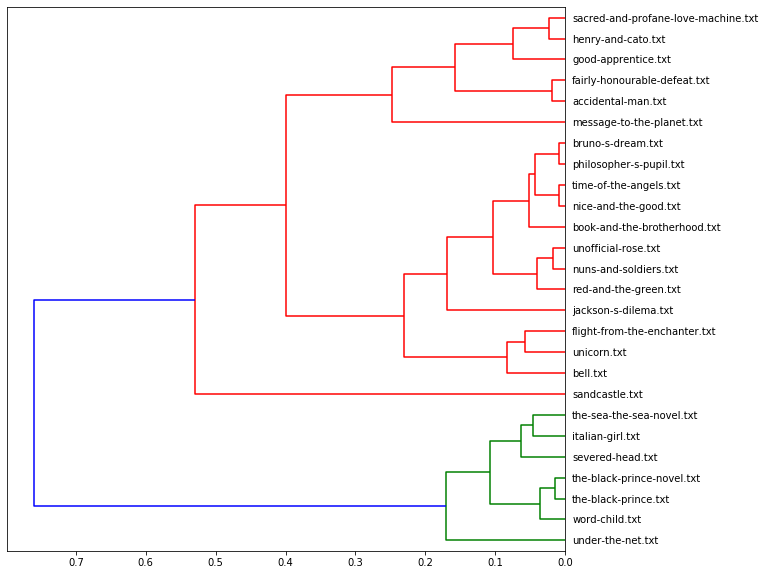

In [4]:
plotStylometry(imTexts, imTitles)